# 🚦 Traffic Sign Classification Model Using LE-NET Architecture for Self Driving Cars: 🚗

- This notebook builds a deep learning model to classify traffic sign images (43 classes) for self-driving cars, using the LeNet architecture proposed by Yann LeCun. Classes include speed limits, caution signs, mandatory directions, etc. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## 📚 Import Libraries and Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Pickle library being used just to open and do serialization of data:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open('./traffic-signs-data/valid.p', mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels'] 
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
# (no. of images, 32 pixels, 32 pixels, depth = 3 i.e R,G,B):
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [5]:
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(34799,)
(4410,)
(12630,)


## 🖼️🔍 Image Exploration (EDA):
Basically cross check the images if they give the correct class/label number.

Checking if it works perfectly for all test, train and validation datasets:

36

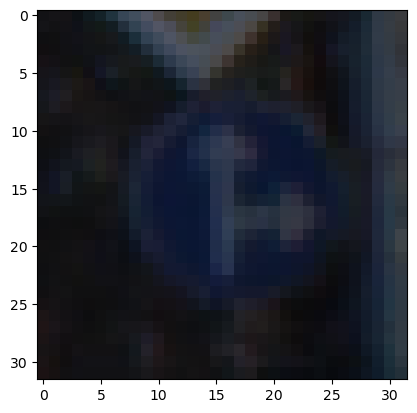

In [6]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

34

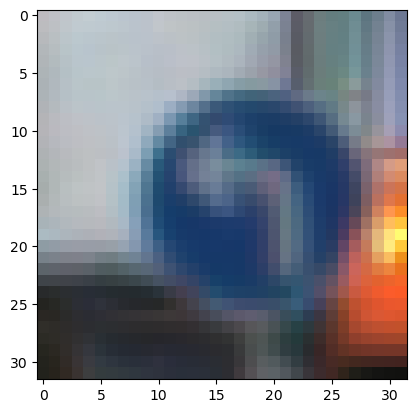

In [7]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

17

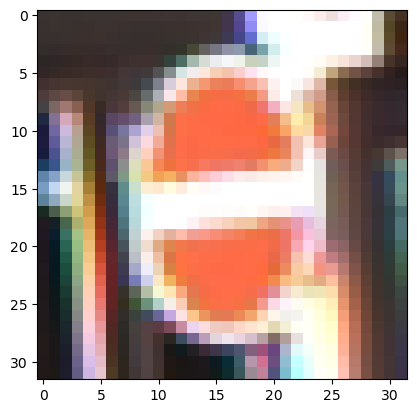

In [8]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

## 🧹 Data Preperation:

In [9]:
# Shuffling the order of the images in the training dataset:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
# Converting the images from color to grayscale:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)    # Dividing by 3 as there are 3 channels: R,G,B
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
print(X_train_gray)
print(X_test_gray)
print(X_validation_gray)

[[[[ 32.33333333]
   [ 42.33333333]
   [ 43.66666667]
   ...
   [ 51.66666667]
   [ 51.66666667]
   [ 56.33333333]]

  [[ 45.33333333]
   [ 70.33333333]
   [ 76.        ]
   ...
   [ 50.33333333]
   [ 51.33333333]
   [ 58.66666667]]

  [[ 38.33333333]
   [ 38.66666667]
   [ 38.        ]
   ...
   [ 53.33333333]
   [ 53.        ]
   [ 61.66666667]]

  ...

  [[ 55.33333333]
   [ 58.33333333]
   [ 54.        ]
   ...
   [ 47.        ]
   [ 50.66666667]
   [ 59.        ]]

  [[ 49.33333333]
   [ 50.66666667]
   [ 49.33333333]
   ...
   [ 41.        ]
   [ 41.        ]
   [ 45.        ]]

  [[ 48.66666667]
   [ 45.33333333]
   [ 40.33333333]
   ...
   [ 40.33333333]
   [ 42.        ]
   [ 43.66666667]]]


 [[[ 18.66666667]
   [ 20.33333333]
   [ 20.66666667]
   ...
   [ 17.        ]
   [ 16.33333333]
   [ 15.        ]]

  [[ 19.        ]
   [ 21.        ]
   [ 22.        ]
   ...
   [ 16.66666667]
   [ 15.66666667]
   [ 15.66666667]]

  [[ 20.33333333]
   [ 20.33333333]
   [ 20.33333333]
 

In [11]:
print(X_train_gray.shape)
print(X_test_gray.shape)
print(X_validation_gray.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [12]:
# Now doing data normalization:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [13]:
# Basically got values from 0 to 1:
X_train_gray_norm

array([[[[-0.74739583],
         [-0.66927083],
         [-0.65885417],
         ...,
         [-0.59635417],
         [-0.59635417],
         [-0.55989583]],

        [[-0.64583333],
         [-0.45052083],
         [-0.40625   ],
         ...,
         [-0.60677083],
         [-0.59895833],
         [-0.54166667]],

        [[-0.70052083],
         [-0.69791667],
         [-0.703125  ],
         ...,
         [-0.58333333],
         [-0.5859375 ],
         [-0.51822917]],

        ...,

        [[-0.56770833],
         [-0.54427083],
         [-0.578125  ],
         ...,
         [-0.6328125 ],
         [-0.60416667],
         [-0.5390625 ]],

        [[-0.61458333],
         [-0.60416667],
         [-0.61458333],
         ...,
         [-0.6796875 ],
         [-0.6796875 ],
         [-0.6484375 ]],

        [[-0.61979167],
         [-0.64583333],
         [-0.68489583],
         ...,
         [-0.68489583],
         [-0.671875  ],
         [-0.65885417]]],


       [[[-0.85416667],


13

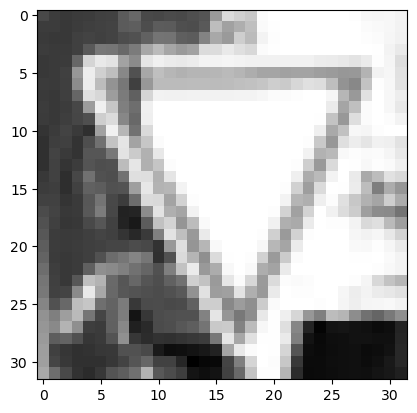

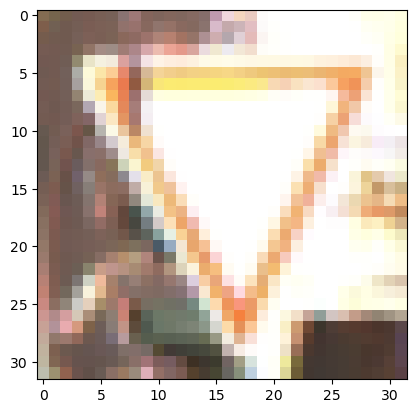

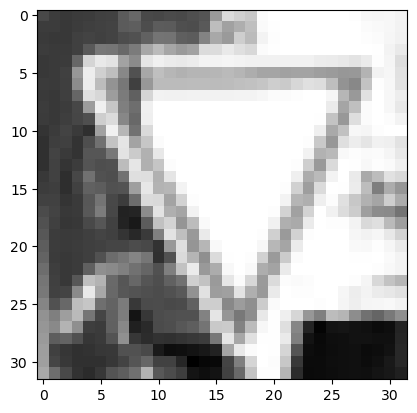

<Figure size 640x480 with 0 Axes>

In [14]:
# Now we shall squeeze and compare the image with its gray scale and norm (for training dataset):
i = 610

# gray scale image:
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()

# Original image:
plt.imshow(X_train[i])
plt.figure()

# Normalized gray scale image:
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

# Putting this just to verify if it is telling correct:
y_train[i]


27

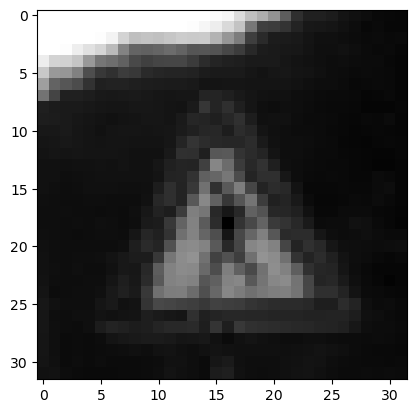

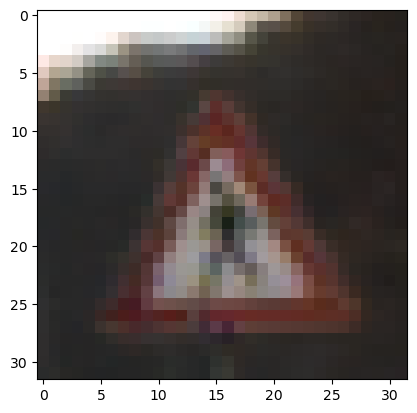

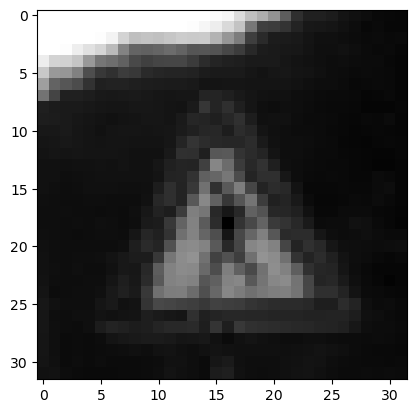

<Figure size 640x480 with 0 Axes>

In [15]:
# Now we shall squeeze and compare the image with its gray scale and norm (for testing dataset):
i = 610

# gray scale image:
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()

# Original image:
plt.imshow(X_test[i])
plt.figure()

# Normalized gray scale image:
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

# Putting this just to verify if it is telling correct:
y_test[i]


22

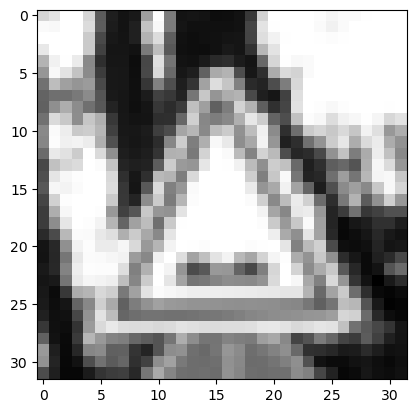

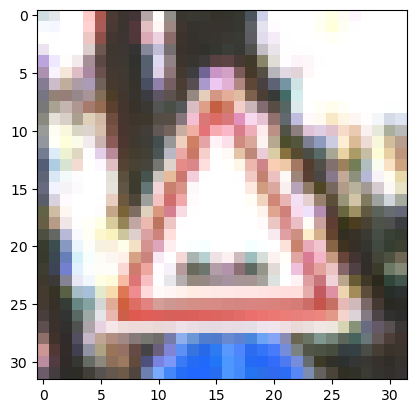

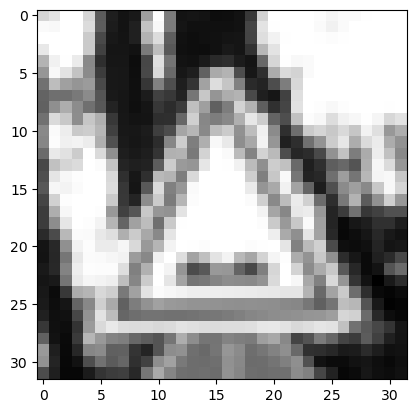

<Figure size 640x480 with 0 Axes>

In [16]:
# Now we shall squeeze and compare the image with its gray scale and norm (for validation dataset):
i = 610

# gray scale image:
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()

# Original image:
plt.imshow(X_validation[i])
plt.figure()

# Normalized gray scale image:
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

# Putting this just to verify if it is telling correct:
y_validation[i]


## 🧠🚀 Model Training:

LE-NET Model is basically taking convulations and then sub sampling and then repeat this.

**Model Architecture:**

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6   (6 ---> no. of kernels)
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6    (In pooling, we divide by 2)


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120  (output 120 is random)
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [17]:
!pip install keras

In [18]:
!pip install tensorflow

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
# Building the Model:
cnn_model = Sequential()

# First Convolution Layer:
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D(pool_size = (2,2)))

# Second Convolution Layer:
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D(pool_size = (2,2)))

# Flattening the model:
cnn_model.add(Flatten())

# A deeply connected neural network layers:
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))

# Output:
cnn_model.add(Dense(units = 43, activation = 'softmax'))

c:\Users\sandh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
# Training Pipeline:
history = cnn_model.fit(X_train_gray_norm,
                y_train,
                batch_size = 500,
                epochs = 500,
                verbose = 1,
                validation_data = (X_validation_gray_norm, y_validation))   

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.1165 - loss: 3.4465 - val_accuracy: 0.3760 - val_loss: 2.4608
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5061 - loss: 1.8135 - val_accuracy: 0.6177 - val_loss: 1.3215
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7195 - loss: 0.9798 - val_accuracy: 0.7118 - val_loss: 0.9313
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8147 - loss: 0.6718 - val_accuracy: 0.7578 - val_loss: 0.7777
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8602 - loss: 0.5216 - val_accuracy: 0.8179 - val_loss: 0.6591
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8849 - loss: 0.4372 - val_accuracy: 0.8297 - val_loss: 0.5995
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9058 - loss: 0.3611 - val_accuracy: 0.8424 - val_loss: 0.5648
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9205 - loss: 0.3080 - val_accuracy: 0.8261 - v

## 🎯📈 Model Evaluation and Inference:

In [23]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8794 - loss: 1.0449
Test Accuracy: 0.8772763013839722


In [24]:
# Information for each epoch:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

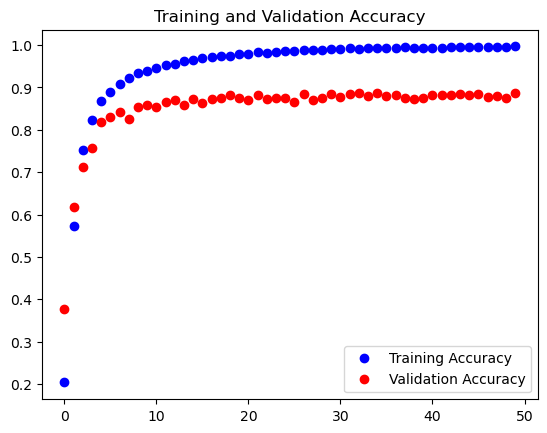

In [26]:
# Plotting the Accuracy:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')    # bo = blue dots, b = blue line
plt.plot(epochs, val_accuracy, 'ro', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

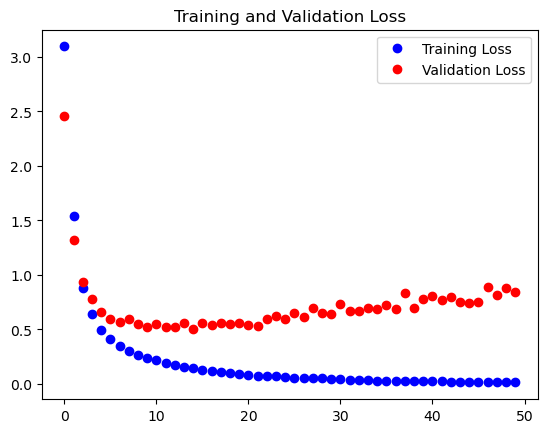

In [27]:
# Plotting the Loss:
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'ro', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [31]:
# Inferencing the model:
y_true = y_test
predicted_probs = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_probs, axis = 1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


The large numbers which are of different colours shows that model was able to classify a lot of samples correctly of that particular class out of the 43 classes.

Whereas, the dark colour shows the misclassification of the samples of that class:

<Axes: >

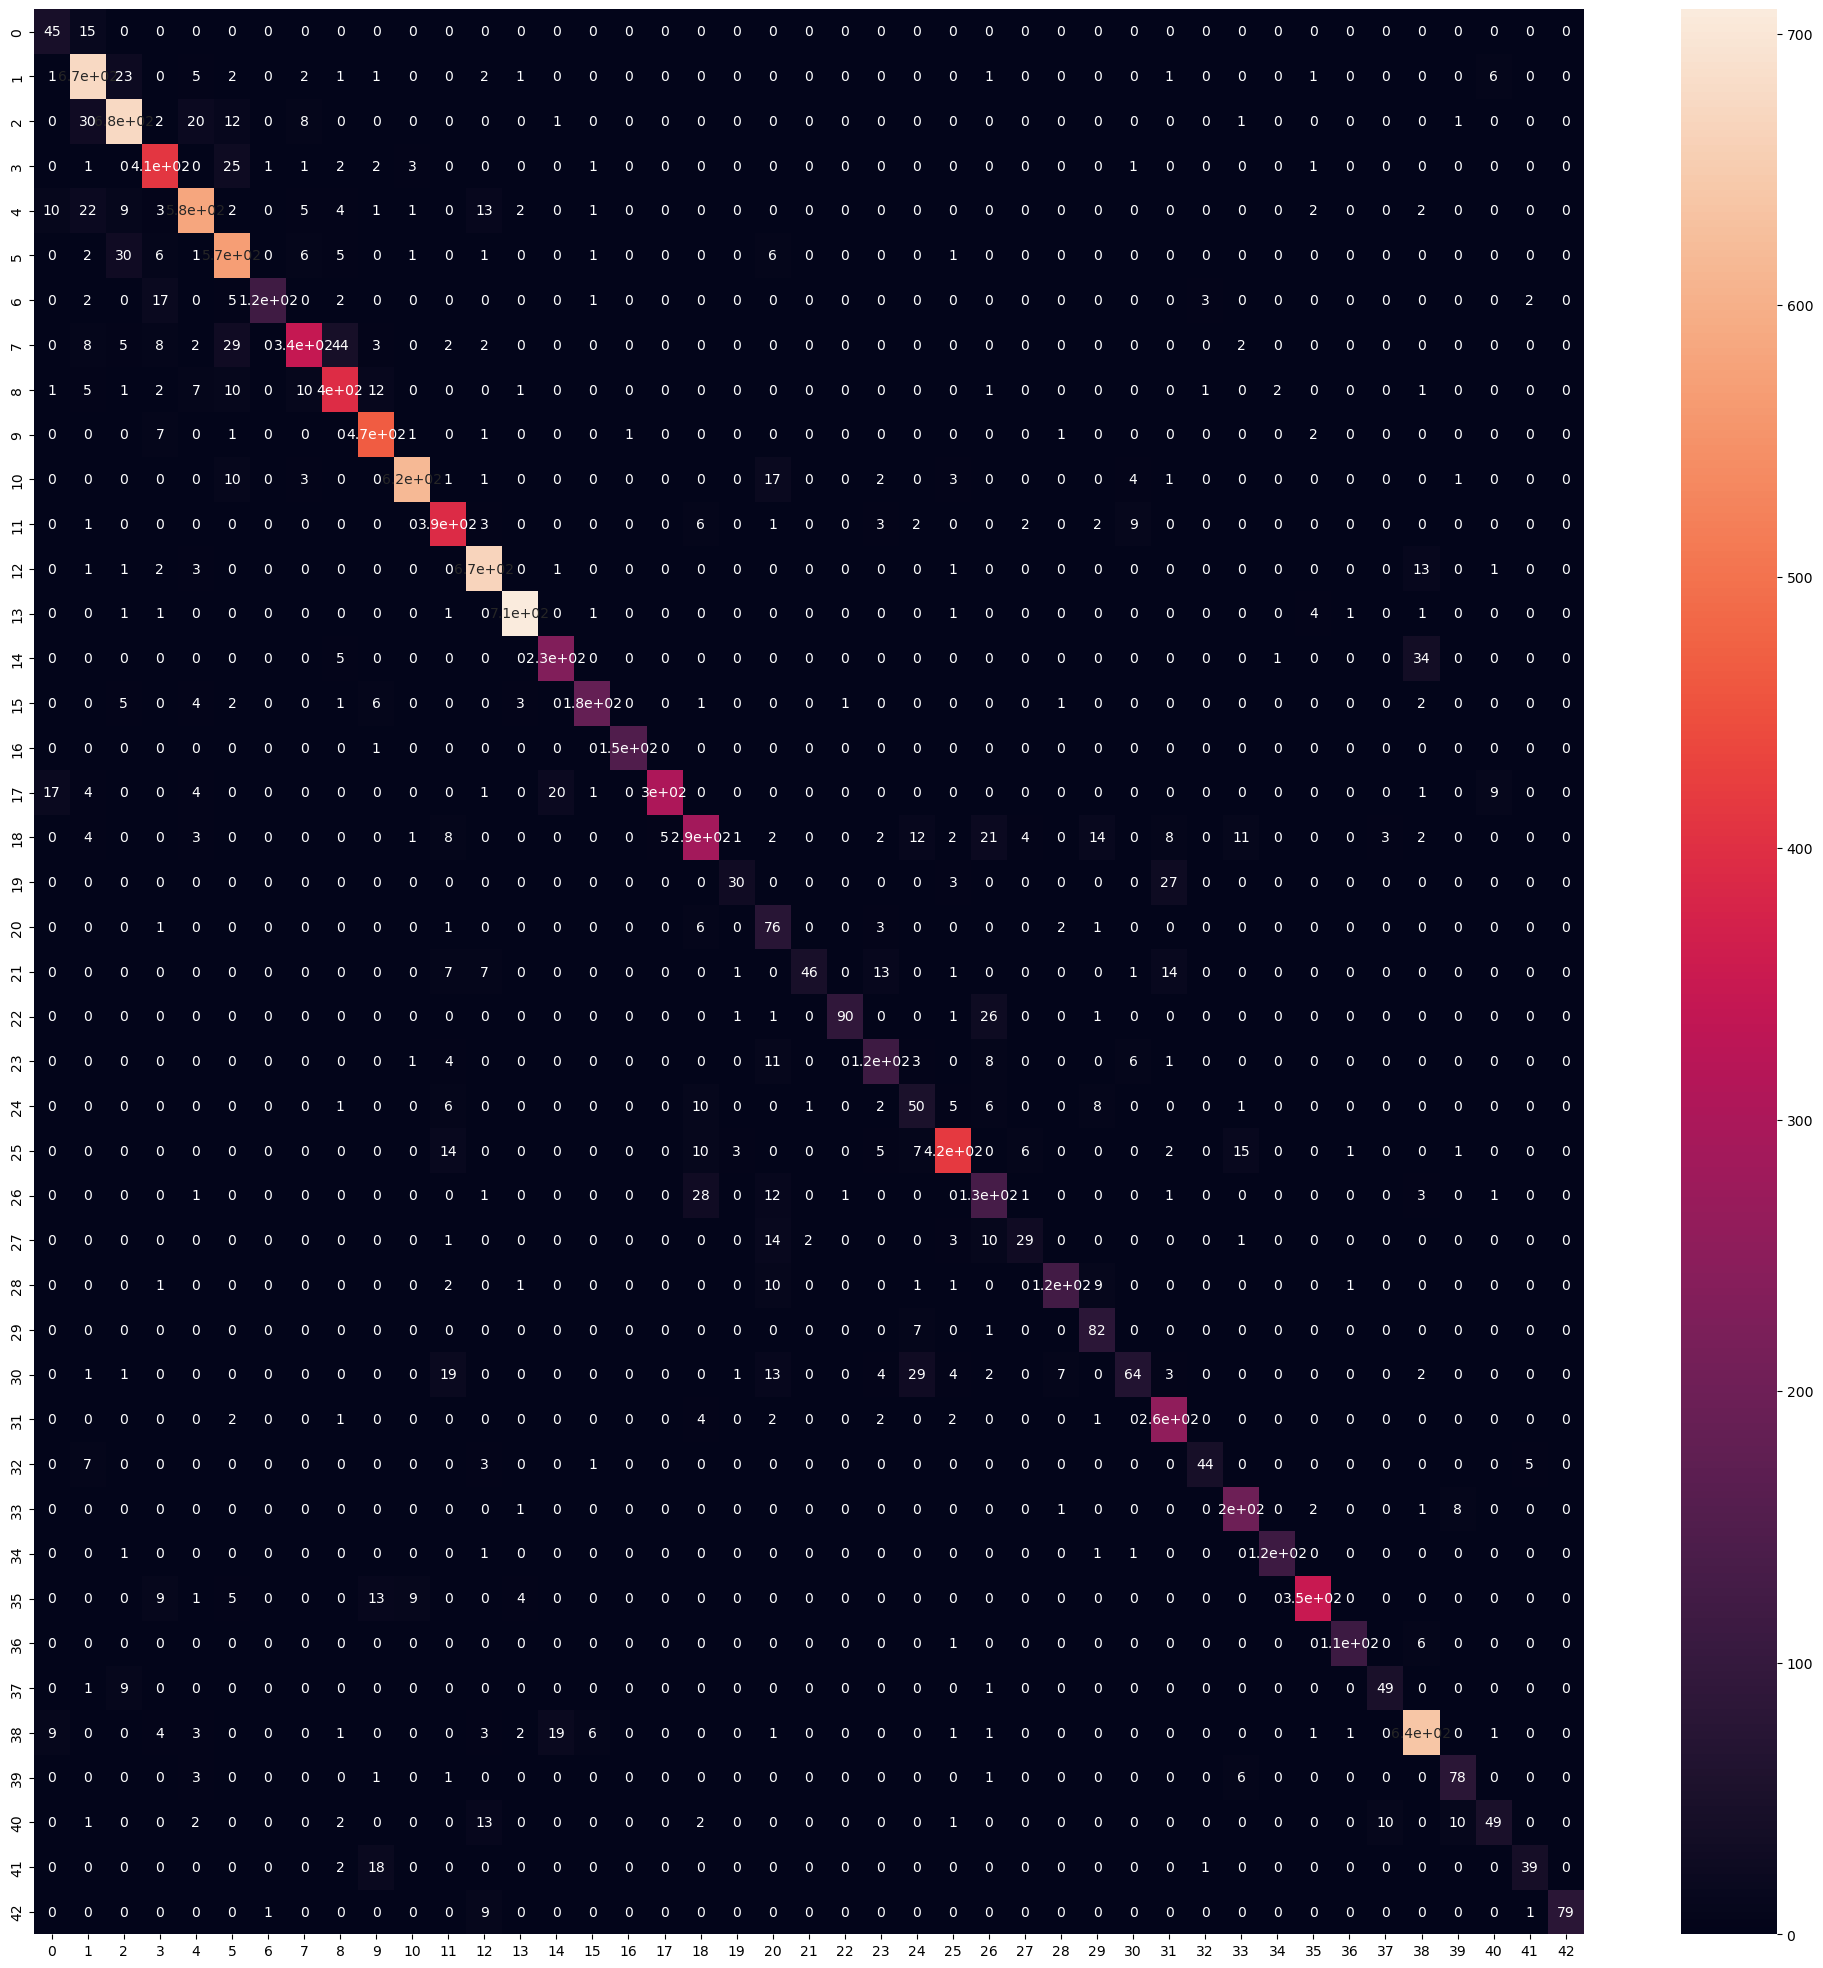

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

Creating a grid to visualize images if they are classified correctly according to their classes or not:


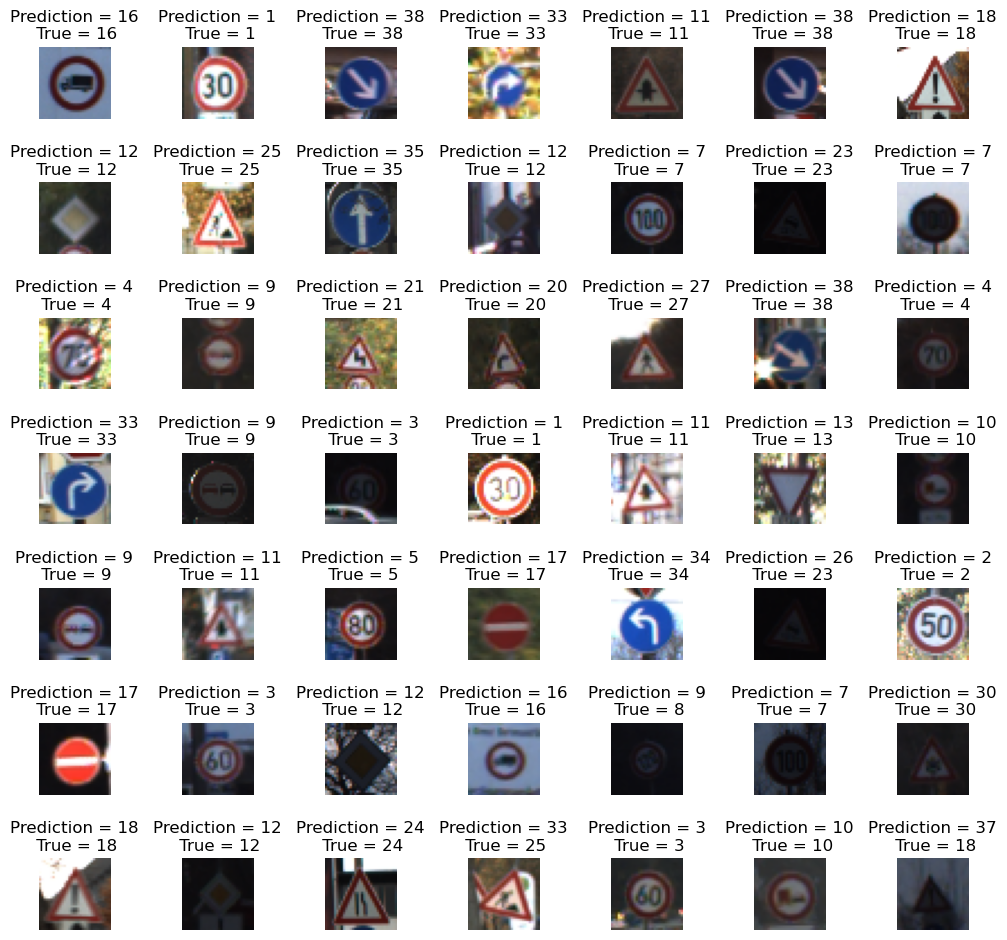

In [33]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    #To remove the axis from each image:
    axes[i].axis('off')
    
# To increase space between the images:
plt.subplots_adjust(wspace = 1)


## 💾 Saving the Model:


In [35]:
# Save the complete model in HDF5 format
model_path = './models/traffic_signs_lenet.h5'
cnn_model.save(model_path)
print(f"Complete model saved successfully at: {model_path}")

# Save the model architecture as JSON
model_json = cnn_model.to_json()
with open('./models/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print("Model architecture saved as JSON")

# Save the model weights with the correct file extension
weights_path = './models/traffic_signs_lenet.weights.h5'
cnn_model.save_weights(weights_path)
print(f"Model weights saved separately at: {weights_path}")


Complete model saved successfully at: ./models/traffic_signs_lenet.h5
Model architecture saved as JSON
Model weights saved separately at: ./models/traffic_signs_lenet.weights.h5
